> scikit-learn 분류기에서 불확실성을 추정할 수 있는 함수 : **decision_function, predict_proba**

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X,y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X,y_named, y, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)


## 결정 함수
> 이진 분류에서 decision_function의 반환값의 크기는(n_samples,)이다. 


In [6]:
print("X_test.shape:", X_test.shape)
print("결정 함수 결과 형태 : ", gbrt.decision_function(X_test).shape)
#1은 양성, 음수는 음성클래스

print("결정 함수:\n", gbrt.decision_function(X_test)[:6])
#부호만 보고 예측결과를 알수 있다. 

X_test.shape: (25, 2)
결정 함수 결과 형태 :  (25,)
결정 함수:
 [ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081]


In [7]:
print("임계치와 결정 함수 결과 비교 : \n", gbrt.decision_function(X_test)>0)
print("예측 :\n", gbrt.predict(X_test))

임계치와 결정 함수 결과 비교 : 
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측 :
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


이진 분류에서 음성 클래스는 항상 classes_속성의 첫번째 원소이고 양성 클래스는 두번째 속성이다. 

In [9]:
greater_zero = (gbrt.decision_function(X_test)>0).astype(int) #0과 1로 바꿈
pred = gbrt.classes_[greater_zero]
print("pred는 예측 결과와 같다.:", np.all(pred == gbrt.predict(X_test)))


pred는 예측 결과와 같다.: True


decision_function 값의 범위는 데이터와 모델 파라미터에 따라 달라진다.

In [10]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최솟값 : {:.2f} 최댓값: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

결정 함수 최솟값 : -7.69 최댓값: 4.29


**모델의 결정경계와 결정함수**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from c

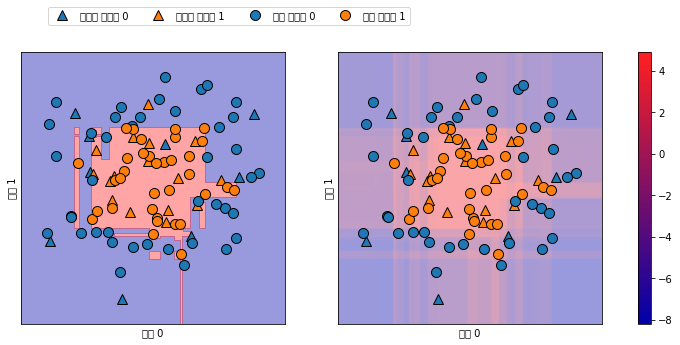

In [18]:
import matplotlib.pyplot as plt
import mglearn
fig, axes = plt.subplots(1,2,figsize=(13,5))
mglearn.tools.plot_2d_separator(gbrt, X, ax= axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax= axes[1], alpha=.4, cm= mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))


## 예측 확률
> predict_proba의 값은 각 클래스에 대한 확률이다. (n_samples , 2)


In [19]:
print("예측 확률:\n", gbrt.predict_proba(X_test[:6]))

예측 확률:
 [[0.01573626 0.98426374]
 [0.84575653 0.15424347]
 [0.98112869 0.01887131]
 [0.97407033 0.02592967]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


일반적으로 복잡도가 낮은 모델은 **예측에 불확실성**이 더 많다.
불확실성과 모델의 정확도가 같으면 **보정**이라고 한다. 즉 70% 확신은 예측 정확도도 70%이다. 


**결정경계와 예측확률**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from c

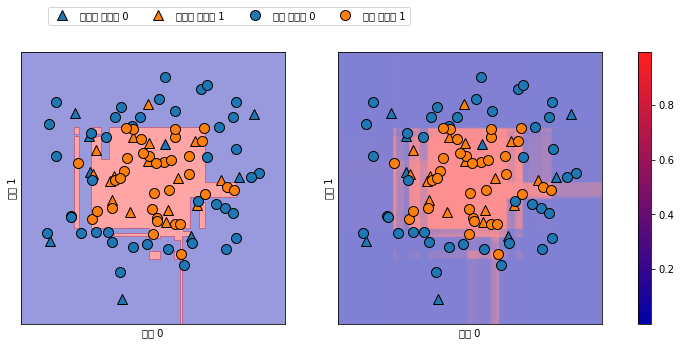

In [21]:
fig, axes = plt.subplots(1,2, figsize=(13,5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill = True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha = .5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0],X_test[:,1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

decision_function보다 결정경계가 뚜렷함

## 다중 분류에서의 불확실성


In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state = 42)

gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0)
gbrt.fit(X_train, y_train)

print("결정 함수의 결과 형태:", gbrt.decision_function(X_test).shape)
print("결정 함수 결과:\n", gbrt.decision_function(X_test)[:6, :])

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
 [[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


decision_function의 모양은 (n_samples, n_classes)
각 열은 클래스에 대한 확신 점수 --> 데이터 포인트마다 점수들에서 가장 큰 값을 찾아 예측결과를 재현함

In [24]:
print("가장 큰 결정 함수의 인덱스:\n", np.argmax(gbrt.decision_function(X_test), axis = 1))
print("예측:\n", gbrt.predict(X_test))


가장 큰 결정 함수의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [25]:
print("예측 확률:\n", gbrt.predict_proba(X_test)[:6])
print("합:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

예측 확률:
 [[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
합: [1. 1. 1. 1. 1. 1.]


In [26]:
#predict_proba의 결과를 이용해 예측하기
print("가장 큰 예측 확률의 인덱스:\n", np.argmax(gbrt.predict_proba(X_test), axis=1))
print("예측:\n", gbrt.predict(X_test))


가장 큰 예측 확률의 인덱스:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [30]:

#실제 classes이름 출력하기
named_target = iris.target_names[y_train]
gbrt.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류:", gbrt.classes_)
print("예측 : ", gbrt.predict(X_test)[:10])
argmax_dec_func = np.argmax(gbrt.decision_function(X_test), axis =1)
print("가장 큰 결정 함수의 인덱스:", argmax_dec_func[:10])
print("인덱스를 classes_에 연결", gbrt.classes_[argmax_dec_func][:10])

훈련 데이터에 있는 클래스 종류: ['setosa' 'versicolor' 'virginica']
예측 :  ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
가장 큰 결정 함수의 인덱스: [1 0 2 1 1 0 1 2 1 1]
인덱스를 classes_에 연결 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
